In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

""" goal: randomly generate a dataset of images with the following properties:
         training set:
             class 0: two cross symbols as the main predictor (add noise and random cropping of 
                                                                 crosses to make less predictive)
                      single solid rectangle in lower left corner as a distractor
             class 1: one cross symbol as main predictor
                      single solid rectangle in lower right corner as distractor
        
         test set:
             as per training but with distractors removed in all cases or most cases...
         
"""

def add_cross(img, class_label, cross_dims=5, add_noise=False):
    """ Add the predictive cross(es) to the image arbirarily (may accidentally intersect the distractor, but
            that's ok). Class label defines how many times the cross is placed to ensure no overlap
    
        Args: 
            class_label: 0 or 1
            add_noise: True/False - if True, add blurring, randomly truncate cross limbs proportional to how
                        long they are
    """

    x_centres = np.random.choice(range(cross_dims, 28-cross_dims), size=[class_label + 1], replace=False)
    y_centres = np.random.choice(range(cross_dims, 28-cross_dims), size=[class_label + 1], replace=False)
    for i in range(class_label+1):

        centre_x = x_centres[i]
        centre_y = y_centres[i]
        img[centre_x-cross_dims:centre_x+cross_dims+1, centre_y] = 1
        img[centre_x, centre_y-cross_dims:centre_y+cross_dims+1] = 1

def add_distractor(img, class_label, tag_dims=[2,3], add_noise=False):
    """ Add a distractor for prediction based on the class label - zero puts it on the left, one puts it on the
            right
        
        Args:
            tag_dims: list of the sizes for the rectangular distractor tag
            add_noise: True/False - if True, blurs the distractor and also shifts its location by some
                        random amount fixed within 2-5 pixels from the edges of the image
    
    """
    tag_buffer = 5
    size_x, size_y = img.shape
    if class_label == 0:
        # buffer of 5 from the border
        img[size_y-tag_buffer-tag_dims[0]:size_y-tag_buffer, tag_buffer:tag_buffer+tag_dims[1]] = 1
        tag_centre_x = (tag_buffer+tag_dims[1]) // 2
        tag_centre_y = 1
    else:
        img[size_y-tag_buffer-tag_dims[0]:size_y-tag_buffer, size_x-tag_buffer-tag_dims[1]:size_x-tag_buffer] = 1
    
    
# img_size = 28
# label = 1
# img_base = np.zeros([img_size,img_size])
# add_cross(img_base, label, np.random.randint(1,3))
# # capture the original image before the distractor gets added and this forms the segmentation
# img_seg = img_base 
# add_distractor(img_base, label)
# plt.imshow(img_base)
# plt.show()

In [101]:
""" Dataset Builder
    Parameters: 
        length: how many images should be generated
        mode: string of either train or test
"""
def make_synthetic_dataset(length, mode, folder, root="../data/synth3", img_size=28, seed=0):
    labels = {}
    labels_dict = pd.DataFrame(columns=["file","class"])
    np.random.seed(seed)
    for n in range(length):
        print("making ", n, " of ", length, " files")
        if n < length//2:
            label = 0
        else:
            label = 1 # even data split

        img_base = np.zeros([img_size,img_size])
        add_cross(img_base, label, 5)  # np.random.randint(3,5)
        img_seg = np.zeros([img_size,img_size])
        img_seg[:,:] = img_base[:,:]
        
        if mode == 'distractor':
            add_distractor(img_base, label)
        
        # save image and segmentation map to file
        np.save("{}/{}_img_{}.npy".format(root, folder, n), img_base)
        np.save("{}/{}_seg_{}.npy".format(root, folder, n), img_seg)

        labels["{}/{}_img_{}.npy".format(root, folder, n)] = label

    labels_dict["file"] = labels.keys()
    labels_dict["file"] = labels_dict["file"].str.replace(root,"")
    labels_dict["file"] = labels_dict["file"].str.replace("/","")
    labels_dict["class"] = labels.values()
    labels_dict = labels_dict.set_index("file")
    labels_dict.to_csv("{}/{}_labels.csv".format(root, folder))

In [102]:
make_synthetic_dataset(512, "distractor", "distractor1", seed=1)
make_synthetic_dataset(512, "distractor", "distractor2", seed=2)
make_synthetic_dataset(512, "distractor", "distractor3", seed=3)


making  0  of  512  files
making  1  of  512  files
making  2  of  512  files
making  3  of  512  files
making  4  of  512  files
making  5  of  512  files
making  6  of  512  files
making  7  of  512  files
making  8  of  512  files
making  9  of  512  files
making  10  of  512  files
making  11  of  512  files
making  12  of  512  files
making  13  of  512  files
making  14  of  512  files
making  15  of  512  files
making  16  of  512  files
making  17  of  512  files
making  18  of  512  files
making  19  of  512  files
making  20  of  512  files
making  21  of  512  files
making  22  of  512  files
making  23  of  512  files
making  24  of  512  files
making  25  of  512  files
making  26  of  512  files
making  27  of  512  files
making  28  of  512  files
making  29  of  512  files
making  30  of  512  files
making  31  of  512  files
making  32  of  512  files
making  33  of  512  files
making  34  of  512  files
making  35  of  512  files
making  36  of  512  files
making  37 

making  334  of  512  files
making  335  of  512  files
making  336  of  512  files
making  337  of  512  files
making  338  of  512  files
making  339  of  512  files
making  340  of  512  files
making  341  of  512  files
making  342  of  512  files
making  343  of  512  files
making  344  of  512  files
making  345  of  512  files
making  346  of  512  files
making  347  of  512  files
making  348  of  512  files
making  349  of  512  files
making  350  of  512  files
making  351  of  512  files
making  352  of  512  files
making  353  of  512  files
making  354  of  512  files
making  355  of  512  files
making  356  of  512  files
making  357  of  512  files
making  358  of  512  files
making  359  of  512  files
making  360  of  512  files
making  361  of  512  files
making  362  of  512  files
making  363  of  512  files
making  364  of  512  files
making  365  of  512  files
making  366  of  512  files
making  367  of  512  files
making  368  of  512  files
making  369  of  512

making  157  of  512  files
making  158  of  512  files
making  159  of  512  files
making  160  of  512  files
making  161  of  512  files
making  162  of  512  files
making  163  of  512  files
making  164  of  512  files
making  165  of  512  files
making  166  of  512  files
making  167  of  512  files
making  168  of  512  files
making  169  of  512  files
making  170  of  512  files
making  171  of  512  files
making  172  of  512  files
making  173  of  512  files
making  174  of  512  files
making  175  of  512  files
making  176  of  512  files
making  177  of  512  files
making  178  of  512  files
making  179  of  512  files
making  180  of  512  files
making  181  of  512  files
making  182  of  512  files
making  183  of  512  files
making  184  of  512  files
making  185  of  512  files
making  186  of  512  files
making  187  of  512  files
making  188  of  512  files
making  189  of  512  files
making  190  of  512  files
making  191  of  512  files
making  192  of  512

making  465  of  512  files
making  466  of  512  files
making  467  of  512  files
making  468  of  512  files
making  469  of  512  files
making  470  of  512  files
making  471  of  512  files
making  472  of  512  files
making  473  of  512  files
making  474  of  512  files
making  475  of  512  files
making  476  of  512  files
making  477  of  512  files
making  478  of  512  files
making  479  of  512  files
making  480  of  512  files
making  481  of  512  files
making  482  of  512  files
making  483  of  512  files
making  484  of  512  files
making  485  of  512  files
making  486  of  512  files
making  487  of  512  files
making  488  of  512  files
making  489  of  512  files
making  490  of  512  files
making  491  of  512  files
making  492  of  512  files
making  493  of  512  files
making  494  of  512  files
making  495  of  512  files
making  496  of  512  files
making  497  of  512  files
making  498  of  512  files
making  499  of  512  files
making  500  of  512

making  279  of  512  files
making  280  of  512  files
making  281  of  512  files
making  282  of  512  files
making  283  of  512  files
making  284  of  512  files
making  285  of  512  files
making  286  of  512  files
making  287  of  512  files
making  288  of  512  files
making  289  of  512  files
making  290  of  512  files
making  291  of  512  files
making  292  of  512  files
making  293  of  512  files
making  294  of  512  files
making  295  of  512  files
making  296  of  512  files
making  297  of  512  files
making  298  of  512  files
making  299  of  512  files
making  300  of  512  files
making  301  of  512  files
making  302  of  512  files
making  303  of  512  files
making  304  of  512  files
making  305  of  512  files
making  306  of  512  files
making  307  of  512  files
making  308  of  512  files
making  309  of  512  files
making  310  of  512  files
making  311  of  512  files
making  312  of  512  files
making  313  of  512  files
making  314  of  512

In [2]:
import os,sys,inspect
sys.path.insert(0,"..") 
import datasets, datasets.SyntheticDataset2
import json, medpy, collections, numpy as np, h5py
import ntpath
import matplotlib.pyplot as plt

In [3]:
d = datasets.SyntheticDataset2.SyntheticDataset2(dataroot="../data/synth2/", mode="distractor1", blur=0.25, nsamples=10, distract_noise=0)

1


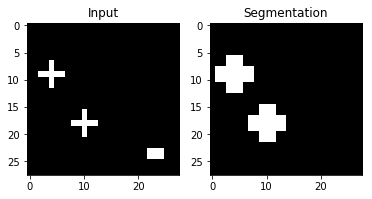

In [4]:
e = d[2]
gridsize = (1,2)
ax2 = plt.subplot2grid(gridsize, (0, 0), colspan=1)
ax3 = plt.subplot2grid(gridsize, (0, 1), colspan=1)

ax2.set_title("Input")
ax2.imshow(e[0][0][0], interpolation='none', cmap='Greys_r')
ax3.set_title("Segmentation")
ax3.imshow(e[0][1][0], interpolation='none', cmap='Greys_r');
print(e[1])

In [12]:
from torch.utils.data import Dataset

class SytheticDataset(Dataset):
    def __init__(self, mode, root="data"):
        self.labels_set = pd.read_csv("{}/labels.csv")
        self.root = root
        self.mode = mode

    def __len__(self):
        return self.labels_set.shape[0]

    def __getitem__(self, index):
        filename = "{}/{}_img_{}.npy".format(self.root, self.mode, index)
        img = np.load(filename)
        img_seg = np.load("{}/{}_seg_{}.npy".format(self.root, self.mode, index))
        
        label = self.labels_set[filename]
        return (img, img_seg), label

In [31]:
# labels = pd.read_csv("../datatrain_labels.csv")

In [39]:
files = labels['file'].loc[labels['class'] == 0]

In [55]:
np.random.seed(10)
nsamples = 100
class0 = labels["file"].loc[labels["class"] == 0]
class1 = labels["file"].loc[labels["class"] == 1]
class0_files = np.random.choice(class0.values, nsamples//2, replace=False)
class1_files = np.random.choice(class1.values, nsamples//2, replace=False)
        
# get the corresponding segmentation files
class0_seg = [f.replace("img","seg") for f in class0]
class1_seg = [f.replace("img","seg") for f in class1]

idx = np.append(class1, class0)
mask_idx = np.append(class1_seg, class0_seg)
labels = np.append(np.ones(len(class1)), np.zeros(len(class0)))

In [58]:
ls 